4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [1]:
import requests
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline

In [2]:
endpoint='https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000'
response = requests.get(endpoint)

In [3]:
response = requests.get(endpoint)

In [4]:
response

<Response [200]>

In [5]:
result = response.json()

In [6]:
top_500_monthly_searches=pd.DataFrame.from_dict(result)

In [7]:
top_500_monthly_searches['year'].unique()

array(['2014', '2017', '2015', '2016', '2018', '2019', '2020', '2021'],
      dtype=object)

In [35]:
monthly_maps=top_500_monthly_searches[top_500_monthly_searches['query_text']=='maps']
monthly_maps=monthly_maps.drop(columns=['month'])
monthly_maps['query_count']=monthly_maps['query_count'].astype(int)

In [42]:
c=monthly_maps.groupby('month_name')['query_count'].sum()
# result = df.groupby(['Courses','Fee'])['Courses'].count()
# print(result)

<Axes: xlabel='month_name'>

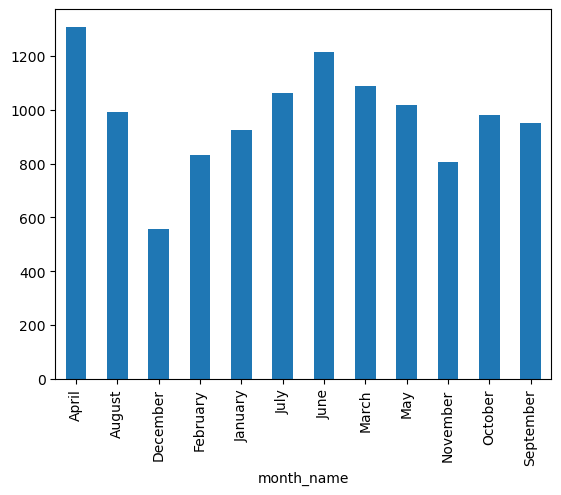

In [43]:
c.plot(kind='bar')